In [ ]:
# The following two packages must be installed on the host machine

# Cartopy
# can be installed with the following command
# conda install -c conda-forge cartopy

# eccodes
# on linux: sudo apt-get install libeccodes0

# if not using the API to access data (login required)
# place the download.grib file in this directory so that the
# notebook can access the data correctly

In [1]:
!pip install cdsapi
!pip install xarray
!pip install cfgrib
!pip install matplotlib
!pip install scipy
!pip install eccodes
!pip install eccodes-python

In [2]:
LOGAN_UTAH_LAT = 41
LOGAN_UTAH_LONG = -111

In [3]:
import cdsapi
import xarray as xr
import matplotlib
import matplotlib.pyplot as plt 
import scipy
import cartopy.crs as ccrs
import cartopy
import numpy as np
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
matplotlib.use("TkAgg")
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

In [4]:
def downloadDataset(c):
    c.retrieve( 'reanalysis-era5-single-levels',
    {
        'variable': [
            'leaf_area_index_low_vegetation', 
            'soil_temperature_level_1', 
            'total_precipitation',
            'volumetric_soil_water_layer_1',
        ],
        'product_type': 'reanalysis',
        'year': [
            '1990', '1995', '2000',
            '2005', '2010', '2015',
            '2020',
        ],
        'month': '05',
        'day': '01',
        'time': '12:00',
    }, 'download.grib')

In [5]:
def getDataSet():
    ds = xr.open_dataset('download.grib', engine='cfgrib')
    return ds

In [6]:
c = cdsapi.Client()
# downloadDataset(c)
data = getDataSet()
print(data)

2021-04-20 18:27:00,824 WARNING Ignoring index file '/home/brett/Desktop/USU/cs5890-sci-vis/finalJ/download.grib.90c91.idx' older than GRIB file
2021-04-20 18:27:01,817 ERROR skipping variable: paramId==228 shortName='tp'
Traceback (most recent call last):
  File "/home/brett/anaconda3/lib/python3.8/site-packages/cfgrib/dataset.py", line 602, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/brett/anaconda3/lib/python3.8/site-packages/cfgrib/dataset.py", line 536, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='time' value=Variable(dimensions=('time',), data=array([ 641563200,  799329600,  957182400, 1114948800, 1272715200,
       1430481600, 1588334400])) new_value=Variable(dimensions=('time',), data=array([ 641541600,  799308000,  957160800, 1114927200, 1272693600,
       1430460000, 1588312800]))


<xarray.Dataset>
Dimensions:              (latitude: 721, longitude: 1440, time: 7)
Coordinates:
    number               int64 ...
  * time                 (time) datetime64[ns] 1990-05-01T12:00:00 ... 2020-0...
    step                 timedelta64[ns] ...
    surface              int64 ...
  * latitude             (latitude) float64 90.0 89.75 89.5 ... -89.75 -90.0
  * longitude            (longitude) float64 0.0 0.25 0.5 ... 359.2 359.5 359.8
    valid_time           (time) datetime64[ns] ...
    depthBelowLandLayer  int64 ...
Data variables:
    lai_lv               (time, latitude, longitude) float32 ...
    stl1                 (time, latitude, longitude) float32 ...
    swvl1                (time, latitude, longitude) float32 ...
Attributes:
    GRIB_edition:            1
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             

In [7]:
def plotMap(data, title):
    fig = plt.figure(figsize=(10,10))
    ax = plt.axes(projection=ccrs.Robinson())
    ax.coastlines(resolution='10m')
    ax.gridlines()
    plot = data.plot(cmap=plt.cm.coolwarm, transform=ccrs.PlateCarree(), cbar_kwargs={'shrink':0.6})
    plt.title(title)

Text(0.5, 1.0, 'Soil Tempurature - Logan, UT')

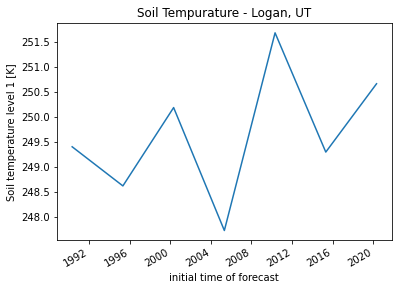

In [13]:
%matplotlib inline
stl1 = data.stl1
lai_lv1d = stl1.isel(latitude=LOGAN_UTAH_LAT, longitude=LOGAN_UTAH_LONG)
lai_lv1d.plot()
plt.title('Soil Tempurature - Logan, UT')

In [92]:
print(data.stl1[0].time.values)

1990-05-01T12:00:00.000000000


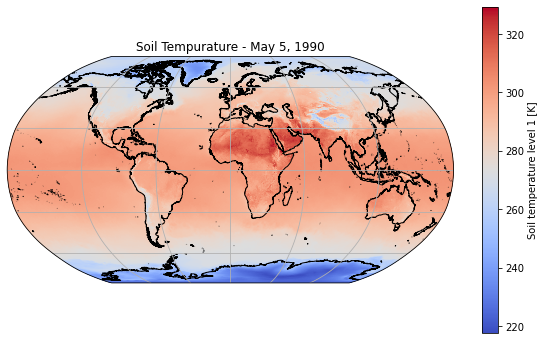

In [137]:
plotMap(stl1[0], 'Soil Tempurature - May 5, 1990')

Text(0.5, 1.0, 'Volumetric Soil Water Layer - Logan, UT')

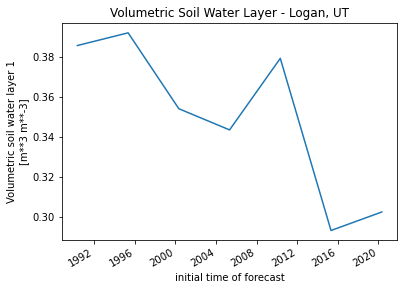

In [14]:
swvl1 = data.swvl1
lai_lv1d = swvl1.isel(latitude=LOGAN_UTAH_LAT, longitude=LOGAN_UTAH_LONG)
lai_lv1d.plot()
plt.title('Volumetric Soil Water Layer - Logan, UT')

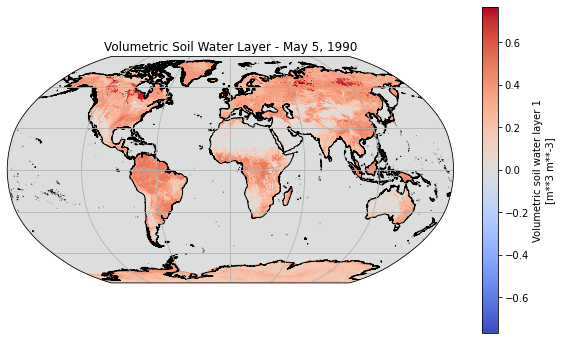

In [138]:
plotMap(swvl1[0], 'Volumetric Soil Water Layer - May 5, 1990')

Text(0.5, 1.0, 'Vegetation - Logan, UT')

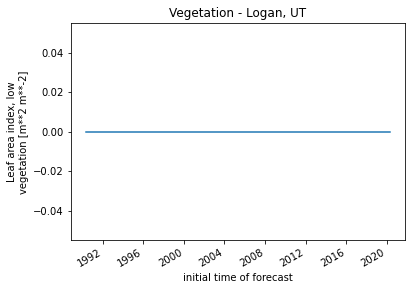

In [15]:
lai_lv = data.lai_lv
lai_lv1d = lai_lv.isel(latitude=LOGAN_UTAH_LAT, longitude=LOGAN_UTAH_LONG)
lai_lv1d.plot()
plt.title('Vegetation - Logan, UT')

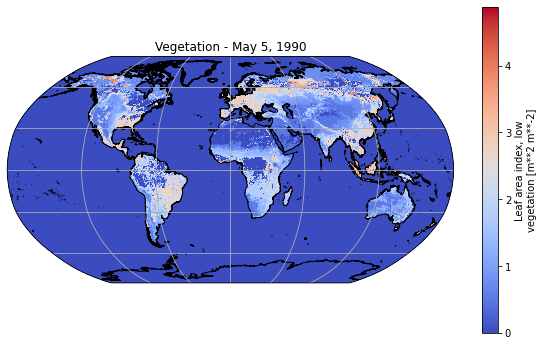

In [139]:
plotMap(lai_lv[0], 'Vegetation - May 5, 1990')

In [9]:
dropdown_widget = widgets.Dropdown(options=['Vegetation', 'Volumetric Soil Water Layer', 'Soil Tempurature'], value='Vegetation', description='Dataset')

In [10]:
dropdown_years = widgets.Dropdown(options=['1990', '1995', '2000', '2005', '2010', '2015', '2020'], value='1990', description='Year')

In [11]:
def plotData(dataset, year):
    yr = int((int(year) - 1990) / 5)
    
    if dataset == 'Vegetation':
        data = lai_lv[yr]
    elif dataset == 'Volumetric Soil Water Layer':
        data = swvl1[yr]
    elif dataset == 'Soil Tempurature':
        data = stl1[yr]
    plotMap(data, dataset + ' - ' + year)

In [16]:
#Please be patient... There is a lot of data to plot
%matplotlib inline
interact(plotData, dataset=dropdown_widget, year=dropdown_years)

interactive(children=(Dropdown(description='Dataset', options=('Vegetation', 'Volumetric Soil Water Layer', 'S…

<function __main__.plotData(dataset, year)>